#ML K Nearest Neighbors - Problem Statement
In this micro-project, we'll use the KNN algorithm to classify instances from a fake dataset into one or the other target class.

In [ ]:
url = "https://www.kaggle.com/datasets/mahmoudlimam/preprocessed-chronic-kidney-disease-dataset" #@param {type:"string"}


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
## Data
df = pd.read_csv('CKD_Preprocessed.csv')
df.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#Standardizing the Variables
Because of the type of data we're dealing with, it's important to standardize the variables before training our model. Skewed distribution of variables makes it harder for our model to deal with it.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Red Blood Cells: normal', 'Pus Cells: normal',
       'Pus Cell Clumps: present', 'Bacteria: present', 'Hypertension: yes',
       'Diabetes Mellitus: yes', 'Coronary Artery Disease: yes',
       'Appetite: poor', 'Pedal Edema: yes', 'Anemia: yes',
       'Chronic Kidney Disease: yes'],
      dtype='object')

In [ ]:
scaler.fit(df.drop('Chronic Kidney Disease: yes',axis=1))

StandardScaler()

In [ ]:
# Now we'll use the .transform() method to transform the features to a scaled version.
scaled_feats = scaler.transform(df.drop('Chronic Kidney Disease: yes',axis=1))

In [ ]:
#Converting the scaled features to a dataframe

scaled_df = pd.DataFrame(scaled_feats)
scaled_df.columns =['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)',
       'Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Red Blood Cells: normal','Pus Cells: normal','Pus Cell Clumps: present'
       ,'Bacteria: present','Hypertension: yes','Diabetes Mellitus: yes','Coronary Artery Disease: yes','Appetite: poor','Pedal Edema: yes','Anemia: yes']
scaled_df.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Red Blood Cells: normal,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes
0,-0.210976,0.272538,0.456253,0.049010,-0.380269,-0.327617,-0.418261,-0.324133,-0.149852,0.046250,...,0.45257,0.5,-0.342518,-0.241249,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,-2.619695,-1.937231,0.456253,2.339065,-0.380269,-0.729618,-0.780098,-0.395257,0.282042,-0.201441,...,0.45257,0.5,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
2,0.611514,0.272538,-1.332593,0.812362,2.507853,3.629061,-0.076526,-0.217447,-0.257826,0.081634,...,0.45257,0.5,-0.342518,-0.241249,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476
3,-0.210976,-0.464051,-2.227017,2.339065,-0.380269,-0.380023,-0.016220,0.138172,-2.849192,-0.732208,...,0.45257,-2.0,2.919556,-0.241249,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476
4,-0.034728,0.272538,-1.332593,0.812362,-0.380269,-0.524141,-0.619282,-0.288571,0.282042,-0.201441,...,0.45257,0.5,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


#Model Building

In [ ]:
#Begin with splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X = scaled_df
y = df['Chronic Kidney Disease: yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Fitting our model.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#Predictions and Evaluations

In [ ]:
predictions = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[39  0]
 [ 4 77]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        39
         1.0       1.00      0.95      0.97        81

    accuracy                           0.97       120
   macro avg       0.95      0.98      0.96       120
weighted avg       0.97      0.97      0.97       120



#Choosing a K Value
A major part of building a ML model with KNN, is choosing a K value to improve the performance of our model. Let's go ahead and use the elbow method to do that.

We will create a loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [ ]:
error_rate =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Now, to make it easier to see what values of K had lower error rates, we'll create a plot using the information from our for loop.

Text(0, 0.5, 'Error Rate')

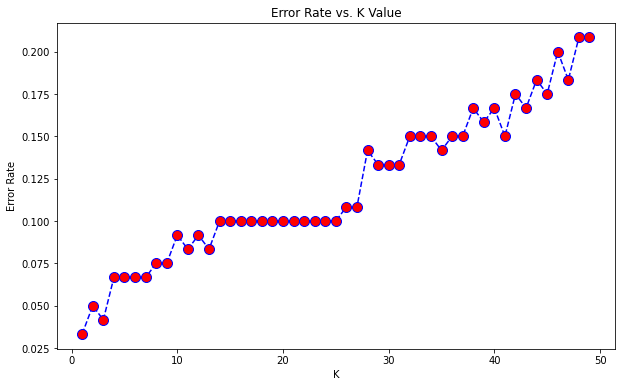

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')